## Using the 4th version of the IPCC WGI reference regions in R.

### Companion to the paper “An update of IPCC climate reference regions for subcontinental analysis of climate model data: Definition and aggregated datasets” (December 2019).

### Maialen Iturbide - Grupo de Meteorología. Instituto de Física de Cantabria (CSIC-UC). Santander, Spain

`IPCC-WGI-reference-regions-v4` is the new set of reference regions that update the IPCC AR5 reference regions (http://www.ipcc-data.org/guidelines/pages/ar5_regions.html) for reporting sub-continental climate information (e.g. CMIP6 projections). This tutorial shows how the standard R packages for spatial data can be used to manipulate and plot these regions, and the R-bundle `climate4R` (https://github.com/SantanderMetGroup/climate4R, Iturbide et al., 2019) can be used to create masks for climate data. 


## Requirements:

The following R packages are used to work with spatial data:

 - rgdal (Bivand et al., 2018): https://cran.r-project.org/web/packages/rgdal/index.html
 - sp (Bivand et al., 2013): https://cran.r-project.org/web/packages/sp/index.html
 - RColorBrewer (Neuwirth, 2014): https://cran.r-project.org/web/packages/RColorBrewer/index.html
 
and the `climate4R` bundle is used to load, analyse and visualize climate data:
 
 - loadeR (Iturbide et al., 2019): https://github.com/SantanderMetGroup/loadeR/wiki
 - visualizeR (Frías et al. 2018): https://github.com/SantanderMetGroup/visualizeR
 - transformeR (Iturbide et al., 2019): https://github.com/SantanderMetGroup/transformeR
 - geoprocessoR (Iturbide et al., 2019): https://github.com/SantanderMetGroup/geoprocessoR

In [1]:
# Package installation for spatial analysis
install.packages("rgdal")
install.packages("sp")
install.packages("RColorBrewer") # color palettes

Installing package into ‘/home/maialen/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/maialen/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/maialen/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [2]:
# and loading
library(rgdal)
library(sp)
library(RColorBrewer)

Loading required package: sp

rgdal: version: 1.5-12, (SVN revision 1018)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 2.2.2, released 2017/09/15
Path to GDAL shared files: /usr/share/gdal/2.2
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 4.8.0, 6 March 2012, [PJ_VERSION: 480]
Path to PROJ shared files: (autodetected)
Linking to sp version:1.4-2



## Using the updated IPCC regions:

### Import the reference regions:

 - From shapefile: the shapefile of `IPCC-WGI-reference-regions-v4` is available for download at the ATLAS GitHub repository (https://github.com/SantanderMetGroup/ATLAS). Function `readOGR` from package `rgdal` reads shapefiles into the R environment. The R object that is obtained is a `SpatialPolygonsDataFrame`, this is a `Spatial*` class object from package `sp`.

In [3]:
refregions <- readOGR(dsn = "MyDir", layer = "IPCC-WGI-reference-regions-v4")
class(refregions)

OGR data source with driver: ESRI Shapefile 
Source: "/media/maialen/work/WORK/GIT/ATLAS/reference-regions/notebooks/MyDir", layer: "IPCC-WGI-reference-regions-v4"
with 58 features
It has 4 fields


[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

 - From R object: the `*.rda` object is also provided in the same link, thus, the Spatial object of the regions can be directly loaded into R as follows:

In [4]:
load("MyDir/IPCC-WGI-reference-regions-v4_R.rda", verbose = TRUE)


Loading objects:
  IPCC_WGI_reference_regions_v4


We can simplify this object by converting it to a `SpatialPolygons` class object.

In [6]:
refregions <- as(IPCC_WGI_reference_regions_v4, "SpatialPolygons")

### Plotting regions:

We can use function `plot` to visualize the regions:

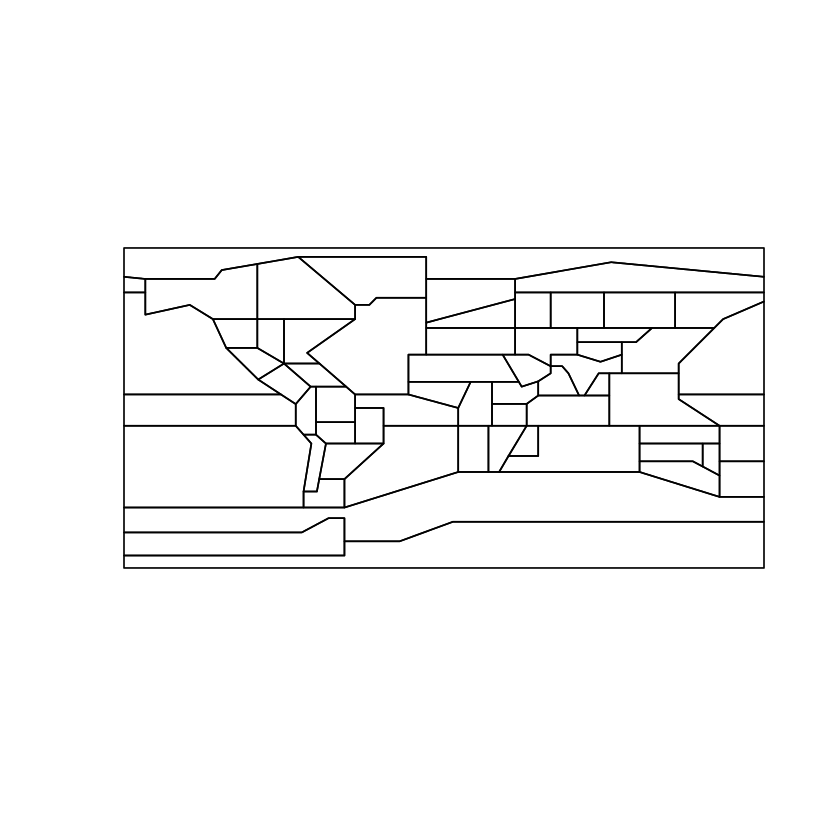

In [7]:
plot(refregions)

The R basic plotting functions allow adding layers to the plot. Here the region names and coastline are added. Shapefiles such as the Global coast lines or country boundaries are easily obtained from the Internet (e.g. https://www.naturalearthdata.com/downloads/).

In [8]:
coastLines <- readOGR(dsn = "MyDir", layer = "WORLD_coastline")

OGR data source with driver: ESRI Shapefile 
Source: "/media/maialen/work/WORK/GIT/ATLAS/reference-regions/notebooks/MyDir", layer: "WORLD_coastline"
with 127 features
It has 2 fields


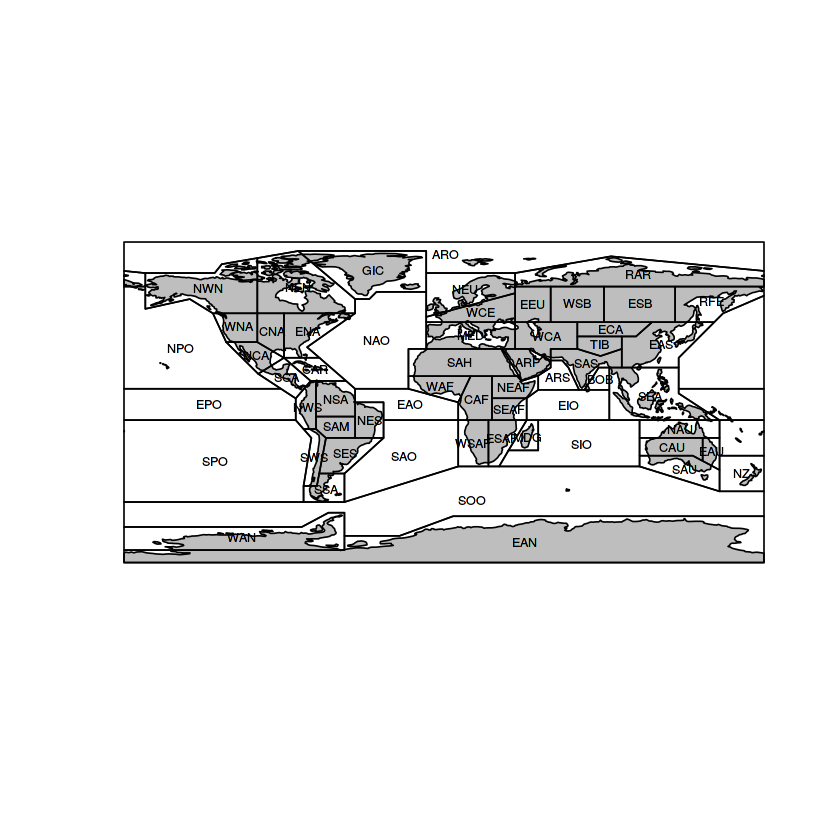

In [9]:
plot(coastLines, col = "grey")
plot(refregions, add = TRUE)
text(x = coordinates(refregions)[,1],
    y = coordinates(refregions)[,2],
    labels = names(refregions), cex = 0.6)

### Selecting specific regions

A singe region:

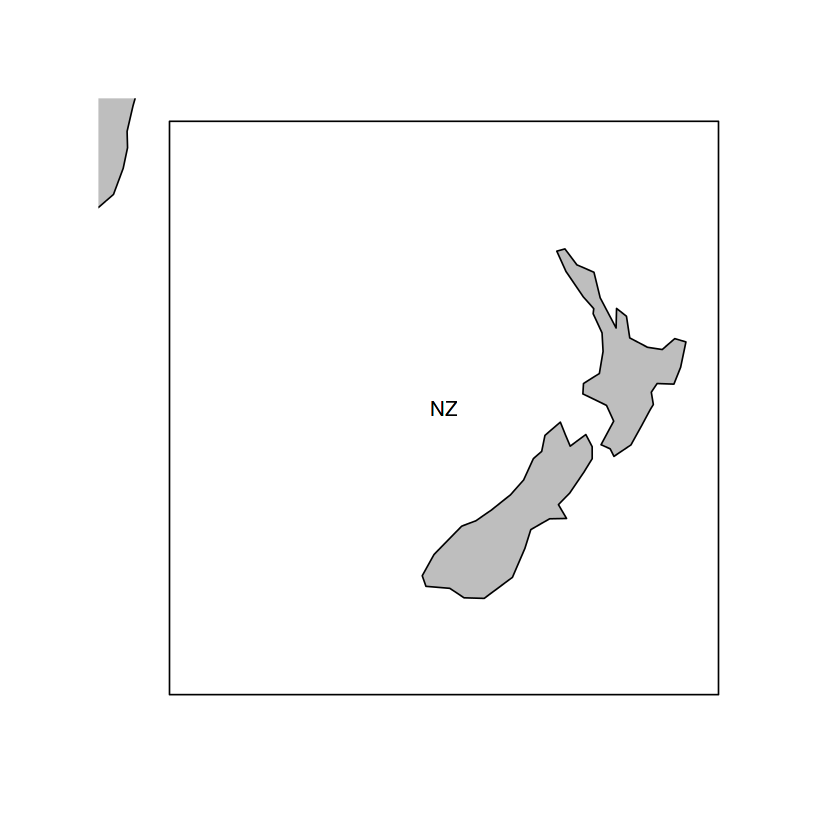

In [10]:
newzealand <- refregions["NZ"]
plot(newzealand)
plot(coastLines, col = "grey", add = TRUE)
text(x = coordinates(newzealand)[,1],
    y = coordinates(newzealand)[,2],
    labels = names(newzealand), cex = 1)

or several:

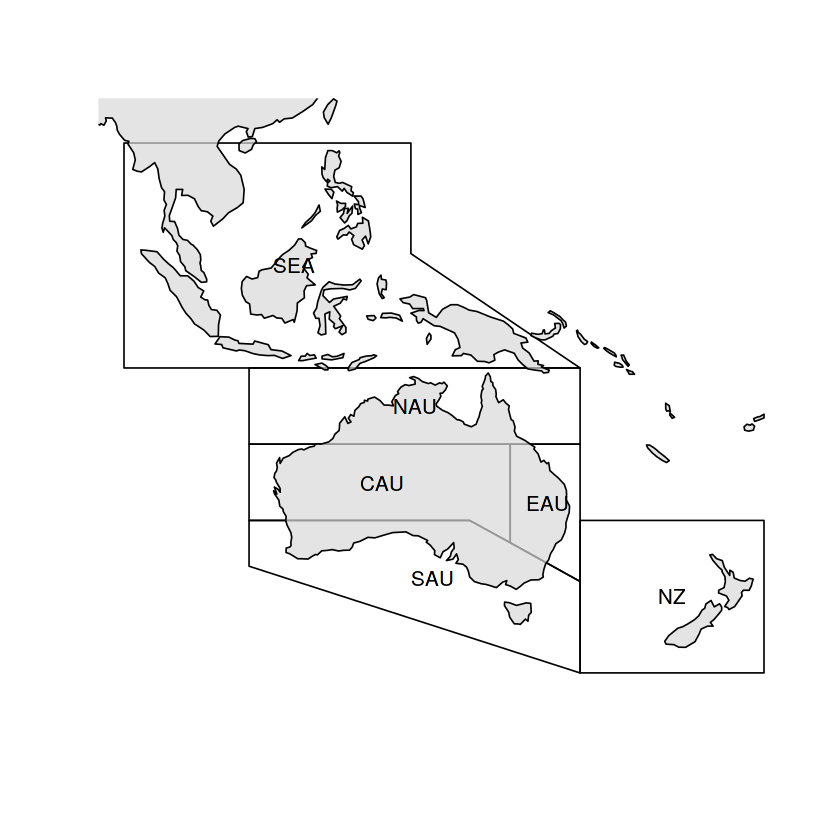

In [11]:
australasia <- refregions[c("NZ", "SEA", "NAU", "CAU", "EAU", "SAU")]

plot(australasia)
plot(coastLines, col = rgb(0.85,0.85,0.85,0.7), add = TRUE)
text(x = coordinates(australasia)[,1],
    y = coordinates(australasia)[,2],
    labels = names(australasia), cex = 1)

## Example:

In this example we will consider a NetCDF file with historical temperature simulations and show several analysis and visualizations at a global scale or filtering by regions. To this aim, we load using `climate4R` an example dataset corresponding to the following ESGF request: 
 - MIP Era: CMIP6
 - Source ID: CESM2
 - Experiment ID: historical
 - Variant Label: r1i1p1f1
 - Table ID: Amon
 - Frequency: mon
 - Variable: tas 

In this case, functions `dataInventory` and `loadGridData` (package `loadeR`) are used. First we need to install the `climate4R` framework (**conda** and **docker** installations available at https://github.com/SantanderMetGroup/ATLAS).

In [ ]:
#install.packages("devtools") # to install packages from GitHub
library(devtools)
install_github(c("SantanderMetGroup/loadeR.java",
                 "SantanderMetGroup/loadeR",
                 "SantanderMetGroup/transformeR",
                 "SantanderMetGroup/visualizeR",
                 "SantanderMetGroup/geoprocessoR")) # climate4R R-bundle

In [12]:
library(loadeR)
library(transformeR)
library(visualizeR)
library(geoprocessoR)

Loading required package: rJava

Loading required package: loadeR.java

Java version 1.7x amd64 by Oracle Corporation detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.0 (2020-07-31) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.7.0 (2020-06-16) is loaded

Please use 'citation("loadeR")' to cite this package.




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.0.1 (2020-06-04) is loaded

Please see 'citation("transformeR")' to cite this package.

visualizeR version 1.6.0 (2020-05-23) is loaded

Please see 'citation("visualizeR")' to cite this package.

geoprocessoR version 0.2.0 (2020-01-06) is loaded

Please see 'citation("geoprocessoR")' to cite this package.



First, `dataInventory` lets us to know the variables available in the file/dataset:  

In [15]:
di <- dataInventory("MyDir/CMIP6Amon_tas_CanESM5_r1i1p1f1_historical_gn_185001-201412.nc")
str(di)

[2020-08-19 11:36:50] Doing inventory ...

[2020-08-19 11:36:51] Retrieving info for 'tas' (0 vars remaining)

[2020-08-19 11:36:51] Done.



List of 1
 $ tas:List of 7
  ..$ Description: chr "Near-Surface Air Temperature"
  ..$ DataType   : chr "float"
  ..$ Shape      : int [1:3] 1980 64 128
  ..$ Units      : chr "K"
  ..$ DataSizeMb : num 64.9
  ..$ Version    : logi NA
  ..$ Dimensions :List of 3
  .. ..$ time:List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr "30.416 days"
  .. .. ..$ Units     : chr "days since 1850-01-01 0:0:0.0"
  .. .. ..$ Date_range: chr "1850-01-16T12:00:00Z - 2014-12-16T12:00:00Z"
  .. ..$ lat :List of 5
  .. .. ..$ Type       : chr "Lat"
  .. .. ..$ Units      : chr "degrees_north"
  .. .. ..$ Values     : num [1:64] -87.9 -85.1 -82.3 -79.5 -76.7 ...
  .. .. ..$ Shape      : int 64
  .. .. ..$ Coordinates: chr "lat"
  .. ..$ lon :List of 5
  .. .. ..$ Type       : chr "Lon"
  .. .. ..$ Units      : chr "degrees_east"
  .. .. ..$ Values     : num [1:128] 0 2.81 5.62 8.44 11.25 ...
  .. .. ..$ Shape      : int 128
  .. .. ..$ Coordinates: chr "lon"


As we can see from the inventory output it contains a single variable, this is “tas” (2 meters air temperature). To load this data `loadGridData` is used:

In [16]:
grid1 <- loadGridData("MyDir/CMIP6Amon_tas_CanESM5_r1i1p1f1_historical_gn_185001-201412.nc", var = "tas")

[2020-08-19 11:36:56] Defining geo-location parameters

[2020-08-19 11:36:56] Defining time selection parameters

[2020-08-19 11:36:56] Retrieving data subset ...

[2020-08-19 11:37:04] Done



The example data is the temperature field for the period 1850-2014. Let’s plot the first time step. To this aim, first we extract the data for January 1850 with the function `subsetGrid` (package `transformeR`):

In [17]:
grid185001 <- subsetGrid(grid1, years = 1850, season = 1, drop = TRUE)

`spatialPlot` is the map plotting function in climate4R (package visualizeR), which uses spplot internally, so it works in a very similar way and implements additional useful parameters (backdrop.theme, set.min, set.max, lonCenter, color.theme, rev.colors).

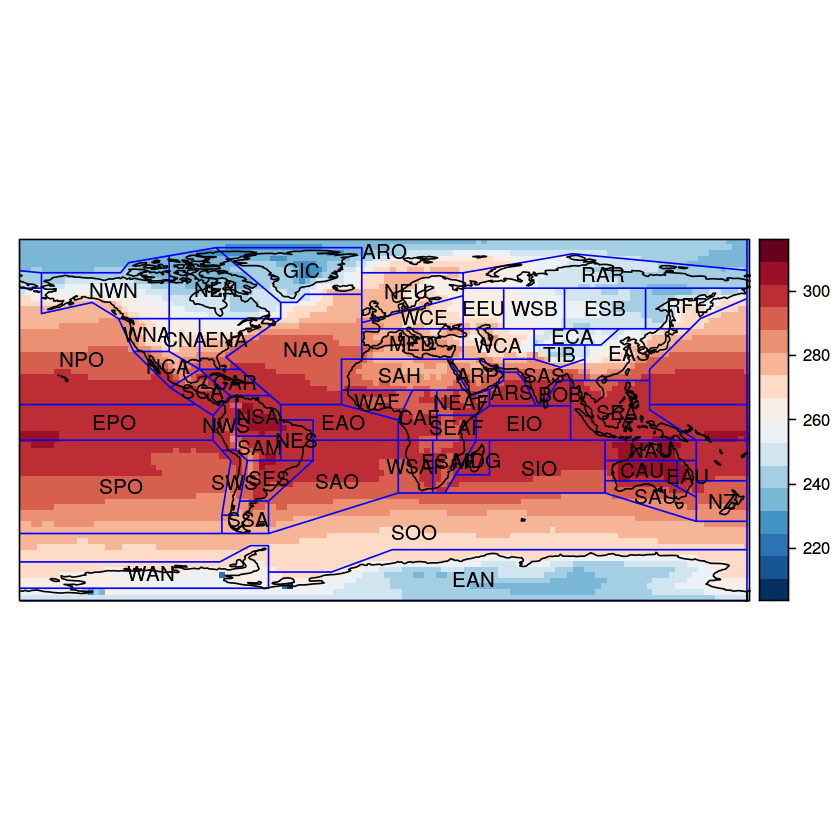

In [18]:
regnameslayer <- list("sp.text", coordinates(refregions), names(refregions))
spatialPlot(grid185001, backdrop.theme = "coastline", 
            color.theme = "RdBu",
            rev.colors = TRUE,
            sp.layout = list(list(refregions, first = FALSE, col = "blue"), regnameslayer))

### Extracting data for the region/s of interest

Function `overGrid` perfoms the operation of intersecting a climate4R grid and a Spatial object. The only requirement is equal projections. Use function `projectGrid` to define and/or change the projection of a grid. Use `proj4string` and `spTransform` for Spatial objects. In this example we do know that the projection is WGS84 (EPSG:4326), thus:

In [19]:
grid185001 <- projectGrid(grid185001, original.CRS = proj4string(refregions))
grid1.au <- overGrid(grid185001, australasia)

Warning message in proj4string(refregions):
“CRS object has comment, which is lost in output”
Warning message in projectGrid(grid185001, original.CRS = proj4string(refregions)):
“CAUTION! Grid with previusly defined projection: LatLonProjection”
[2020-08-19 11:37:21] Arguments of the original projection defined as +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0



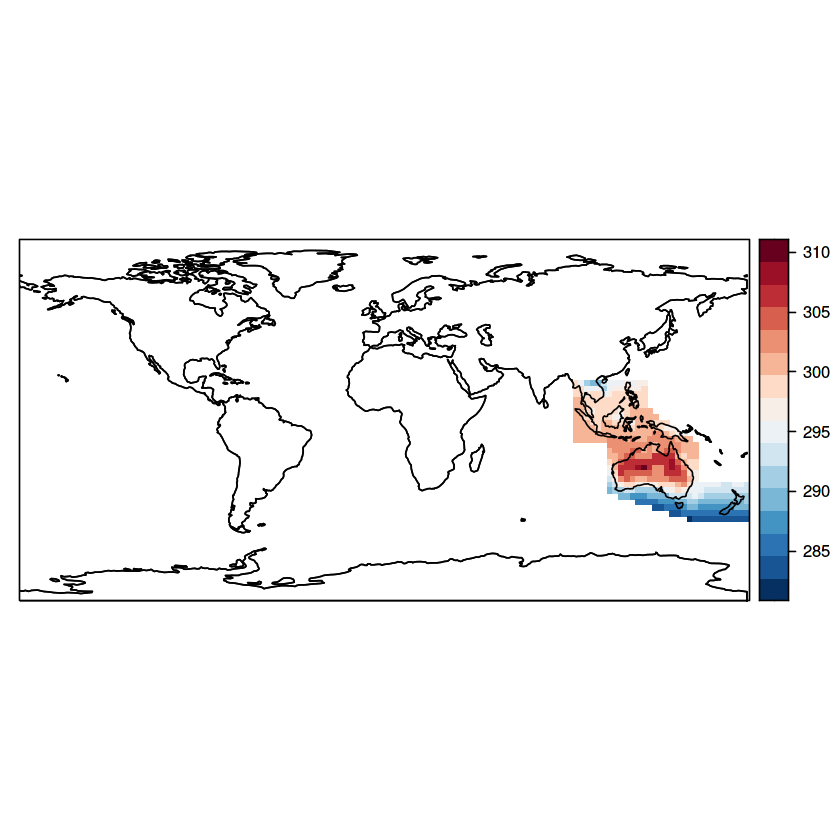

In [20]:
spatialPlot(grid1.au, 
            color.theme = "RdBu",
            rev.colors = TRUE,
            sp.layout = list(coastLines, first = FALSE, col = "black"))

If we set argument subset as TRUE we obtain ...

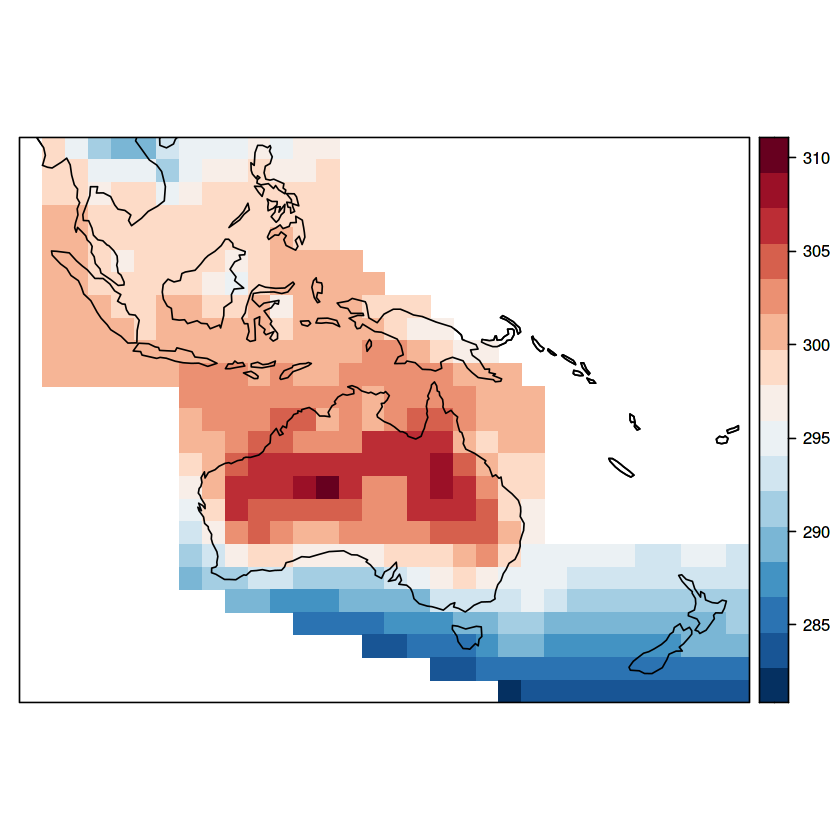

In [21]:
grid1.au <- overGrid(grid185001, australasia, subset = TRUE)
spatialPlot(grid1.au, 
            color.theme = "RdBu",
            rev.colors = TRUE,
            sp.layout = list(coastLines, first = FALSE, col = "black"))

Let’s calculate the regional average and visualize the yearly time series with `temporalPlot`:

Warning message in proj4string(refregions):
“CRS object has comment, which is lost in output”
Warning message in projectGrid(grid1, original.CRS = proj4string(refregions)):
“CAUTION! Grid with previusly defined projection: LatLonProjection”
[2020-08-19 11:37:30] Arguments of the original projection defined as +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0

[2020-08-19 11:37:37] Performing annual aggregation...

[2020-08-19 11:37:44] Done.

pad applied on the interval: year



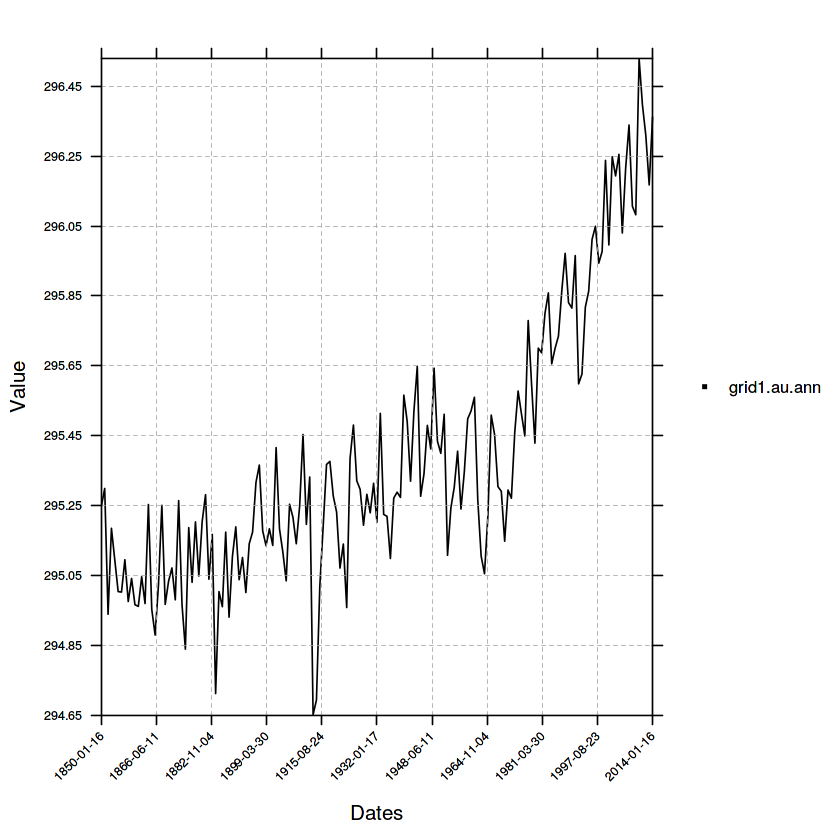

In [22]:
grid1 <- projectGrid(grid1, original.CRS = proj4string(refregions))
grid1.au <- overGrid(grid1, australasia)
grid1.au.ann <- aggregateGrid(grid1.au, aggr.y = list(FUN = "mean", na.rm = TRUE))
temporalPlot(grid1.au.ann, aggr.spatial = list(FUN = "mean", na.rm = TRUE))

## References

Bivand R.S., Pebesma E.J., Gomez-Rubio V. (2013). Applied spatial data analysis with R, Second edition. Springer, NY. http://www.asdar-book.org/

Bivand R.S., Keitt T., Rowlingson B. (2018). rgdal: Bindings for the ‘Geospatial’ Data Abstraction Library. R package version 1.3-6. https://CRAN.R-project.org/package=rgdal

Frías M.D., Iturbide M., Manzanas R., Bedia J., Fernández J., Herrera S., Cofiño A.S., Gutiérrez J.M. (2018). An R package to visualize and communicate uncertainty in seasonal climate prediction. Environmental Modelling and Software, 99, 101-110, http://doi.org/10.1016/j.envsoft.2017.09.008

Iturbide M., Bedia J., Herrera S., Baño-Medina J., Fernández J., Frías M., Manzanas R., San-Martín D., Cimadevilla E., Cofiño A., Gutiérrez J. (2019). The R-based climate4R open framework for reproducible climate data access and post-processing. Environmental Modelling & Software. doi: https://doi.org/10.1016/j.envsoft.2018.09.009

Neuwirth E. (2014). RColorBrewer: ColorBrewer Palettes. R package version 1.1-2. https://CRAN.R-project.org/package=RColorBrewer

Sarkar D. (2008) Lattice: Multivariate Data Visualization with R. Springer, NY. ISBN 978-0-387-75968-5

## Session info

In [23]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 14.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/libblas/libblas.so.3.0
LAPACK: /usr/lib/lapack/liblapack.so.3.0

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=es_ES.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=es_ES.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=es_ES.UTF-8          LC_NAME=es_ES.UTF-8          
 [9] LC_ADDRESS=es_ES.UTF-8        LC_TELEPHONE=es_ES.UTF-8     
[11] LC_MEASUREMENT=es_ES.UTF-8    LC_IDENTIFICATION=es_ES.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] geoprocessoR_0.2.0  visualizeR_1.6.0    transformeR_2.0.1  
 [4] loadeR_1.7.0        climate4R.UDG_0.2.0 loadeR.java_1.1.1  
 [7] rJava_0.9-13        RColorBrewer_1.1-2  rgdal_1.5-12       
[10] sp_1.4-2           

loaded via a namespace (and not attached):
 [1